In [12]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import IPython.display as ipd

In [9]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [11]:
x, fs = librosa.load(librosa.example('trumpet'))

In [13]:
ipd.Audio(x, rate=fs)

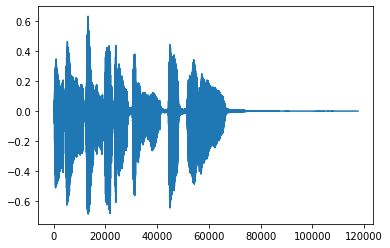

In [14]:
plt.plot(x)

# Função novidade baseada em energia
Essa função se baseia no cálculo da energia local do sinal

In [42]:
E = x**2
N = 1024
w = sp.signal.hann(N)
Ex = np.convolve(E, w, 'same')
Ex2 = np.convolve(E, sp.signal.boxcar(N), 'same')
Ex3 = np.convolve(E, sp.signal.blackman(N), 'same')

Text(0.5, 1.0, '$E_w^x(n)$ com diferentes janelas')

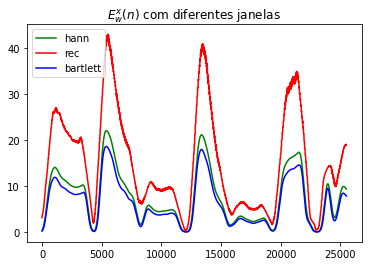

In [58]:
plt.plot(Ex[0:25500], 'g', label='hann')
plt.plot(Ex2[0:25500], 'r', label='rec')
plt.plot(Ex3[0:25500], 'b', label='bartlett')
plt.legend()
plt.title('$E_w^x(n)$ com diferentes janelas')

In [51]:
E_diff = np.diff(Ex)
# aqui, estamos "completando" o sinal (padding) 
# pra que os tamanhos dos vetores se mantenham
E_diff = np.concatenate(E_diff, [0.])

Text(0.5, 1.0, '$E_w^x(n+1) - E_w^x(n)$')

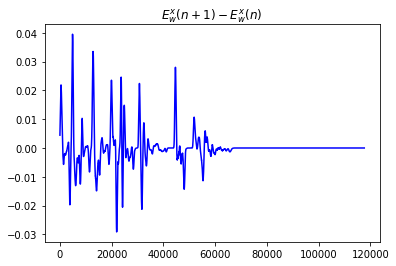

In [55]:
plt.plot(E_diff, 'b', label='E diff')
plt.title('$E_w^x(n+1) - E_w^x(n)$')

Text(0.5, 1.0, '$E_w^x(n+1) - E_w^x(n)$')

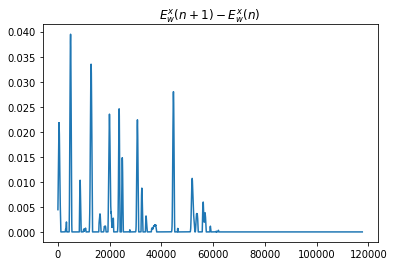

In [59]:
E_diff[E_diff < 0] = 0
plt.plot(E_diff)
plt.title('$E_w^x(n+1) - E_w^x(n)$')

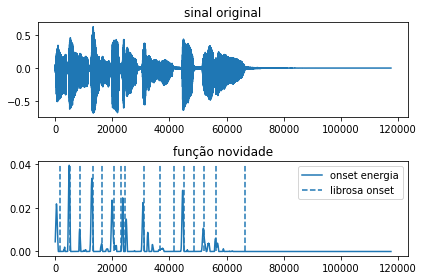

In [79]:
plt.subplot(2,1,1)
plt.plot(x)
plt.title('sinal original')
plt.subplot(2,1,2)
plt.plot(E_diff, label = 'onset energia')
plt.vlines(librosa.onset.onset_detect(x, sr=fs, units='samples')
           , 0, E_diff.max(), linestyle='--' 
           , label = 'librosa onset')
plt.title('função novidade')
plt.legend()
plt.tight_layout()

# Função novidade baseada em espectro

# Função novidade baseada em fase

# Função novidade baseada no domínio complexo

# Detecção de pico

# Análise dos resultados